In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [131]:
# Reading world happiness file
hap_ds = pd.read_csv('World_Happiness.csv')
hap_ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [132]:
# taking the head() of data
hap_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [133]:
# Columns of dataset
hap_ds.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [134]:
# Chedck datatypes
hap_ds.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [135]:
#Converting object data into numbers
le = LabelEncoder()
arr = ['Country', 'Region']
for var in arr:
    hap_ds[var] = hap_ds[var].astype('category')
    hap_ds[var] = le.fit_transform(hap_ds[var])

In [136]:
hap_ds.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [137]:
#Checking the sum of null values
hap_ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

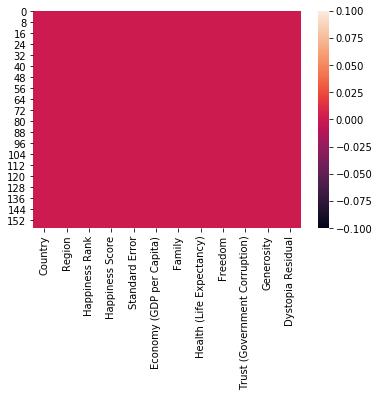

In [138]:
# Visualization : Checking null values thrugh heatmap
sns.heatmap(hap_ds.isnull())
plt.show()

In [139]:
# Correlation between features
hap_ds.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


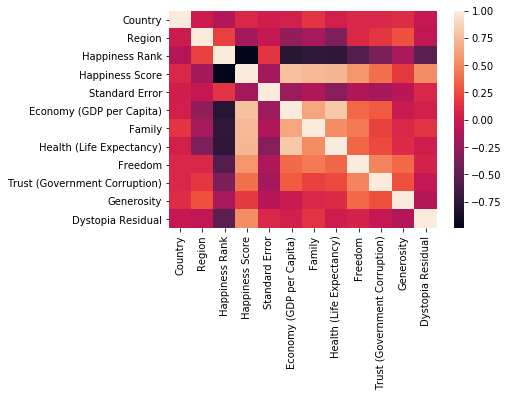

In [140]:
# Correlation through heatmap
sns.heatmap(hap_ds.corr())

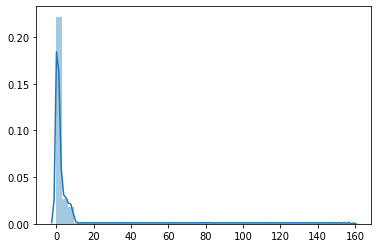

In [141]:
sns.distplot(hap_ds)

In [142]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [143]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3)

x_input = hap_ds.drop(columns = ['Happiness Score'])
kModel =kmeans.fit(x_input)

In [144]:
kModel.cluster_centers_

array([[4.81489362e+01, 4.55319149e+00, 3.92978723e+01, 4.41304255e-02,
        1.12097447e+00, 1.17171404e+00, 7.98874255e-01, 5.00886170e-01,
        1.77462340e-01, 2.49849787e-01, 2.34403872e+00],
       [1.25112903e+02, 4.80645161e+00, 7.35000000e+01, 4.87000000e-02,
        8.83848387e-01, 1.03946581e+00, 6.41673387e-01, 4.34466452e-01,
        1.41119194e-01, 2.38066452e-01, 2.10660968e+00],
       [4.86326531e+01, 6.06122449e+00, 1.25632653e+02, 5.04542857e-02,
        5.34801633e-01, 7.56486122e-01, 4.54084490e-01, 3.51889592e-01,
        1.13684286e-01, 2.24278163e-01, 1.85425939e+00]])

In [145]:
import pandas as pd
pd.crosstab(hap_ds['Happiness Score'], kModel.labels_)

col_0,0,1,2
Happiness Score,,,
2.839,0,1,0
2.905,0,0,1
3.006,0,1,0
3.340,0,0,1
3.465,0,0,1
...,...,...,...
7.427,1,0,0
7.522,1,0,0
7.527,1,0,0


In [146]:
from sklearn.metrics import homogeneity_score
print (homogeneity_score(kModel.labels_, hap_ds['Happiness Score']))

0.9919565890217104


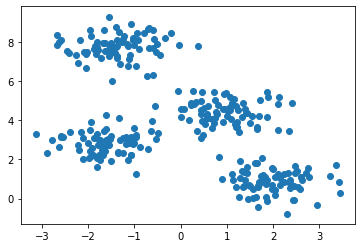

In [147]:
X, y = make_blobs (n_samples=300, centers=4, cluster_std=0.60, random_state= 0)
plt.scatter(X[:,0], X[:,1])

In [148]:
kmeans = KMeans (n_clusters=4)
pred_y = kmeans.fit_predict(X)

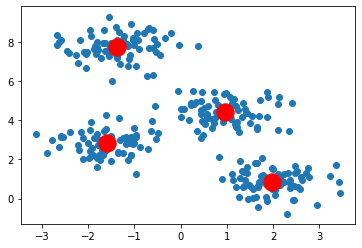

In [149]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300, c='red')
plt.show()